## Exercice 9.1

Modélisation de la croissance du nombre de bactéries dans un volume donné (une mesure par heure)

In [1]:
import pandas
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
input_df = pandas.read_csv("Bacterie.csv",sep=";")

In [3]:
input_df

,nHeure,population
0,0,32
1,1,47
2,2,65
3,3,92
4,4,132
5,5,190
6,6,275


Représentation graphique des données brutes:

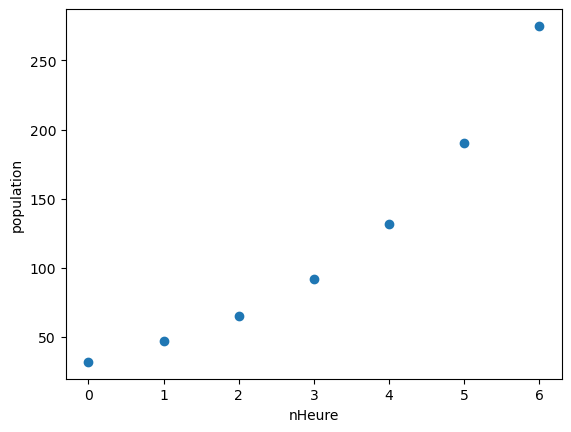

In [4]:
plt.plot(input_df['nHeure'],input_df['population'],'o')
plt.xlabel('nHeure')
plt.ylabel('population')
plt.show()

On se doute bien qu'un modèle linéaire ne sera pas idéal mais, aveuglèment, on peut essayer...

Ce ne sont pas les formules générales qui nous diront si il y a un problème...

In [5]:
a_modele_lineaire = input_df.cov()['population']['nHeure']/input_df.cov()['nHeure']['nHeure']
b_modele_lineaire = input_df['population'].mean() - a_modele_lineaire * input_df['nHeure'].mean()

a_modele_lineaire, b_modele_lineaire

(38.642857142857146, 3.071428571428555)

In [6]:
input_df

,nHeure,population
0,0,32
1,1,47
2,2,65
3,3,92
4,4,132
5,5,190
6,6,275


In [7]:
input_df['Modèle linéaire'] = a_modele_lineaire*input_df['nHeure'] + b_modele_lineaire

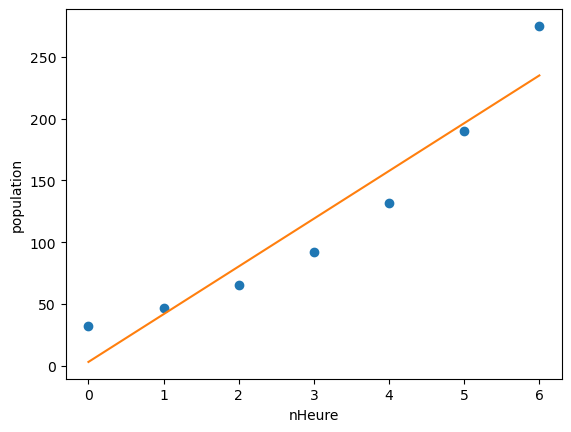

In [8]:
plt.plot(input_df['nHeure'], input_df['population'], 'o')
plt.plot(input_df['nHeure'], input_df['Modèle linéaire'], '-')
plt.xlabel('nHeure')
plt.ylabel('population')
plt.show()

In [9]:
input_df["Résidus du modèle linéaire"] = input_df.apply(lambda r:np.abs(r['population']-r["Modèle linéaire"]), axis=1)

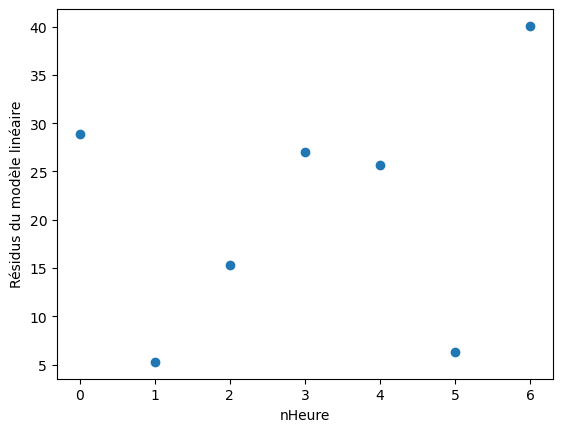

In [10]:
plt.plot(input_df['nHeure'], input_df['Résidus du modèle linéaire'], 'o')
plt.xlabel('nHeure')
plt.ylabel('Résidus du modèle linéaire')
plt.show()

In [11]:
input_df['ln population'] = np.log(input_df['population'])

In [12]:
input_df

,nHeure,population,Modèle linéaire,Résidus du modèle linéaire,ln population
0,0,32,3.071429,28.928571,3.465736
1,1,47,41.714286,5.285714,3.850148
2,2,65,80.357143,15.357143,4.174387
3,3,92,119.000000,27.000000,4.521789
4,4,132,157.642857,25.642857,4.882802
5,5,190,196.285714,6.285714,5.247024
6,6,275,234.928571,40.071429,5.616771


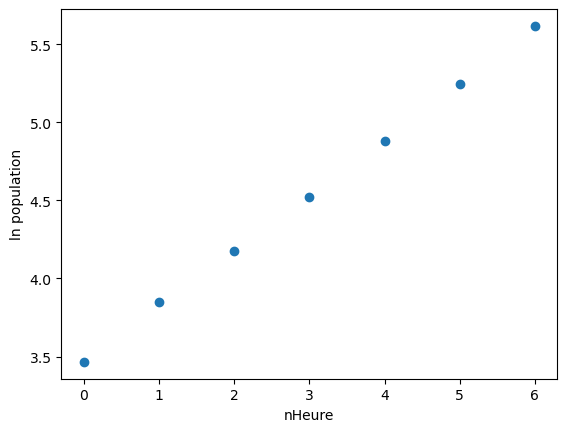

In [13]:
plt.plot(input_df['nHeure'], input_df['ln population'], 'o')
plt.xlabel('nHeure')
plt.ylabel('ln population')
plt.show()

In [14]:
input_df[['nHeure','ln population']].cov()

,nHeure,ln population
nHeure,4.666667,1.659212
ln population,1.659212,0.590119


In [15]:
A = input_df[['nHeure','ln population']].cov()['nHeure']['ln population']/input_df[['nHeure','ln population']].cov()['nHeure']['nHeure']
A

0.35554547064971875

In [16]:
B = input_df['ln population'].mean() - A * input_df['nHeure'].mean()
B

3.4703145086033986

In [17]:
input_df['Modele ln population vs nHeure'] = A * input_df['nHeure'] + B

In [18]:
input_df

,nHeure,population,Modèle linéaire,Résidus du modèle linéaire,ln population,Modele ln population vs nHeure
0,0,32,3.071429,28.928571,3.465736,3.470315
1,1,47,41.714286,5.285714,3.850148,3.825860
2,2,65,80.357143,15.357143,4.174387,4.181405
3,3,92,119.000000,27.000000,4.521789,4.536951
4,4,132,157.642857,25.642857,4.882802,4.892496
5,5,190,196.285714,6.285714,5.247024,5.248042
6,6,275,234.928571,40.071429,5.616771,5.603587


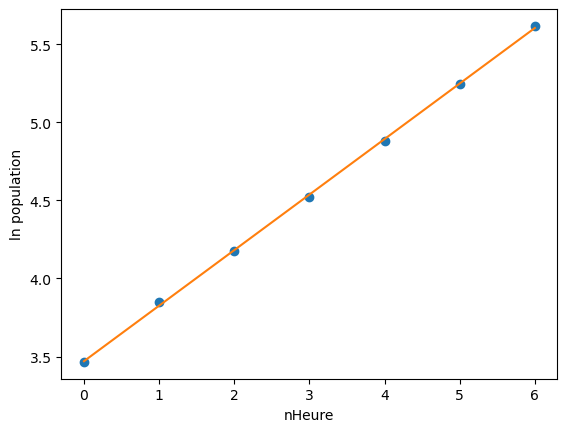

In [19]:
plt.plot(input_df['nHeure'], input_df['ln population'], 'o')
plt.plot(input_df['nHeure'], input_df['Modele ln population vs nHeure'], '-')
plt.xlabel('nHeure')
plt.ylabel('ln population')
plt.show()

In [20]:
input_df["Résidus dans l'espace linéaire"] = input_df.apply(lambda r:np.abs(r['ln population']-r['Modele ln population vs nHeure']), axis=1)

In [21]:
input_df

,nHeure,population,Modèle linéaire,Résidus du modèle linéaire,ln population,Modele ln population vs nHeure,Résidus dans l'espace linéaire
0,0,32,3.071429,28.928571,3.465736,3.470315,0.004579
1,1,47,41.714286,5.285714,3.850148,3.825860,0.024288
2,2,65,80.357143,15.357143,4.174387,4.181405,0.007018
3,3,92,119.000000,27.000000,4.521789,4.536951,0.015162
4,4,132,157.642857,25.642857,4.882802,4.892496,0.009694
5,5,190,196.285714,6.285714,5.247024,5.248042,0.001018
6,6,275,234.928571,40.071429,5.616771,5.603587,0.013184


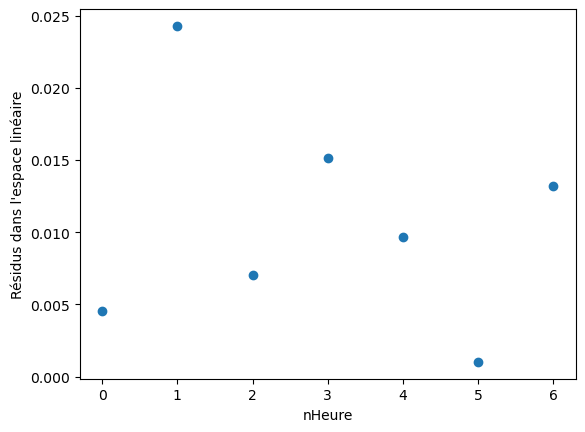

In [22]:
plt.plot(input_df['nHeure'], input_df["Résidus dans l'espace linéaire"], 'o')
plt.xlabel('nHeure')
plt.ylabel("Résidus dans l'espace linéaire")
plt.show()

In [23]:
input_df['Modele population vs nHeure'] = np.exp(input_df['Modele ln population vs nHeure'])

input_df

,nHeure,population,Modèle linéaire,Résidus du modèle linéaire,ln population,Modele ln population vs nHeure,Résidus dans l'espace linéaire,Modele population vs nHeure
0,0,32,3.071429,28.928571,3.465736,3.470315,0.004579,32.146851
1,1,47,41.714286,5.285714,3.850148,3.825860,0.024288,45.872233
2,2,65,80.357143,15.357143,4.174387,4.181405,0.007018,65.457786
3,3,92,119.000000,27.000000,4.521789,4.536951,0.015162,93.405565
4,4,132,157.642857,25.642857,4.882802,4.892496,0.009694,133.285893
5,5,190,196.285714,6.285714,5.247024,5.248042,0.001018,190.193478
6,6,275,234.928571,40.071429,5.616771,5.603587,0.013184,271.398259


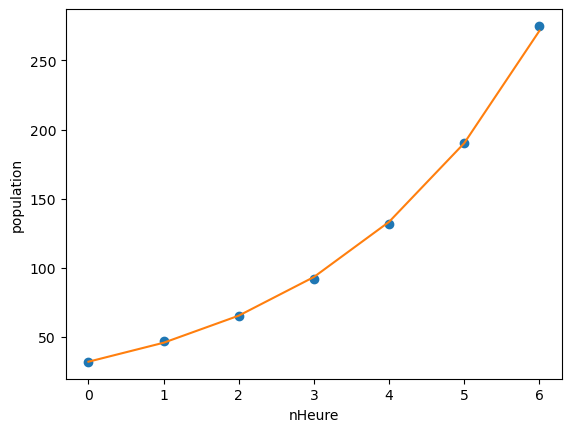

In [24]:
plt.plot(input_df['nHeure'], input_df['population'], 'o')
plt.plot(input_df['nHeure'], input_df['Modele population vs nHeure'], '-')
plt.xlabel('nHeure')
plt.ylabel('population')
plt.show()

In [25]:
input_df["Résidus dans l'espace initial (non linéaire)"] = input_df.apply(lambda r:np.abs(r['population']-r['Modele population vs nHeure']), axis=1)

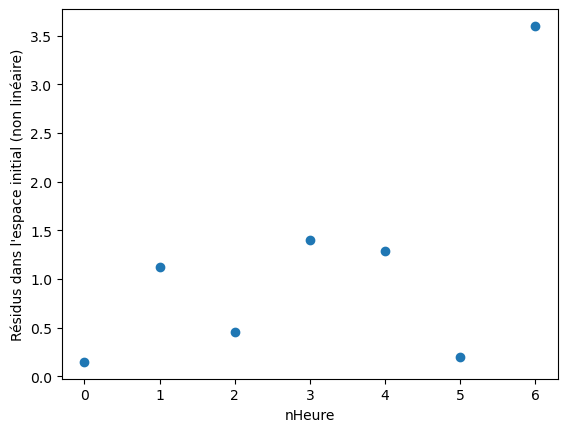

In [26]:
plt.plot(input_df['nHeure'], input_df["Résidus dans l'espace initial (non linéaire)"], 'o')
plt.xlabel('nHeure')
plt.ylabel("Résidus dans l'espace initial (non linéaire)")
plt.show()

Même si les résidus restent tous positifs, leurs amplitudes est de loin inférieurs à ce qu'ils sont pour le modèle linéaire initial!!!

Notre modèle non-linéaire est donc mieux adapté aux données.

In [27]:
input_df.columns

Index(['nHeure', 'population', 'Modèle linéaire', 'Résidus du modèle linéaire',
       'ln population', 'Modele ln population vs nHeure',
       'Résidus dans l'espace linéaire', 'Modele population vs nHeure',
       'Résidus dans l'espace initial (non linéaire)'],
      dtype='object')

In [28]:
facteur_reduction_residus = input_df['Résidus du modèle linéaire'].max()/input_df["Résidus dans l'espace initial (non linéaire)"].max()
facteur_reduction_residus

11.125571936864675

Soit une dimnution relative des amplitudes de résidus d'un facteur d'environ 11.12... 

ce n'est pas rien même si cela n'est pas parfait!

Peut-on maintenant calculer sur base du couple (A,B) les valeurs de (a,b) du modèle exponentiel général?

In [29]:
a = np.exp(A)
b = np.exp(B)

In [30]:
a, b

(1.426958806179804, 32.146851316317445)

In [31]:
input_df.columns

Index(['nHeure', 'population', 'Modèle linéaire', 'Résidus du modèle linéaire',
       'ln population', 'Modele ln population vs nHeure',
       'Résidus dans l'espace linéaire', 'Modele population vs nHeure',
       'Résidus dans l'espace initial (non linéaire)'],
      dtype='object')

In [32]:
input_df['Modele population vs nHeure (calcul direct)'] = input_df.apply(lambda r:b*np.power(a,r['nHeure']), axis=1)

In [33]:
input_df

,nHeure,population,Modèle linéaire,Résidus du modèle linéaire,ln population,Modele ln population vs nHeure,Résidus dans l'espace linéaire,Modele population vs nHeure,Résidus dans l'espace initial (non linéaire),Modele population vs nHeure (calcul direct)
0,0,32,3.071429,28.928571,3.465736,3.470315,0.004579,32.146851,0.146851,32.146851
1,1,47,41.714286,5.285714,3.850148,3.825860,0.024288,45.872233,1.127767,45.872233
2,2,65,80.357143,15.357143,4.174387,4.181405,0.007018,65.457786,0.457786,65.457786
3,3,92,119.000000,27.000000,4.521789,4.536951,0.015162,93.405565,1.405565,93.405565
4,4,132,157.642857,25.642857,4.882802,4.892496,0.009694,133.285893,1.285893,133.285893
5,5,190,196.285714,6.285714,5.247024,5.248042,0.001018,190.193478,0.193478,190.193478
6,6,275,234.928571,40.071429,5.616771,5.603587,0.013184,271.398259,3.601741,271.398259


In [36]:
interpolate_df = pandas.DataFrame()
interpolate_df['nHeure'] = np.linspace(0, 8)
interpolate_df['population'] = interpolate_df.apply(lambda r:b*np.power(a,r['nHeure']), axis=1)

interpolate_df.tail()

,nHeure,population
45,7.346939,438.116700
46,7.510204,464.301234
47,7.673469,492.050717
48,7.836735,521.458678
49,8.000000,552.624238


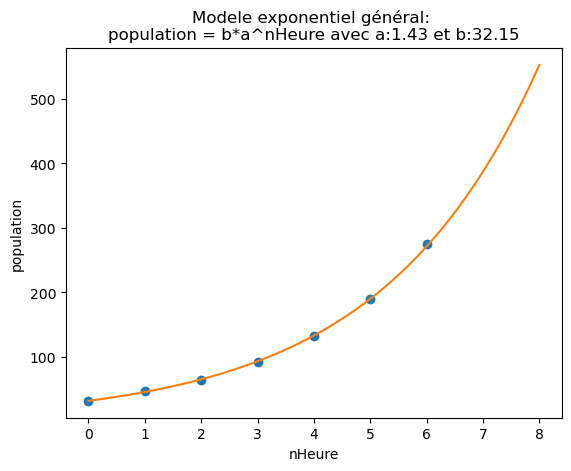

In [38]:
plt.plot(input_df['nHeure'], input_df['population'], 'o')
plt.plot(interpolate_df['nHeure'], interpolate_df['population'], '-')
plt.xlabel('nHeure')
plt.ylabel('population')
plt.title('Modele exponentiel général: \npopulation = b*a^nHeure avec a:{:.2f} et b:{:.2f}'.format(a,b))
plt.show()